In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../gefera')
import gefera as gf

In [52]:
t = np.linspace(91.2, 91.6, 100000)

ap = 1.0
tp = 0.25
ep = 0.0
pp = 365
wp = 0.0 * np.pi / 180
ip = 90.0 * np.pi / 180

am = 0.007
tm = 0.05
em = 0.0
pm = 3
om = 0.00 * np.pi / 180
wm = 90 * np.pi / 180
im = 90.0 * np.pi / 180
mm = 0.01

u1 = 0.5
u2 = 0.3
rp = 0.18
rm = 0.1

In [53]:
# figure out the lan/lop confusion 
po = gf.PrimaryOrbit(ap, tp, ep, pp, wp, ip)
mo = gf.SatelliteOrbit(am, tm, em, pm, om, wm, im, mm)
sys = gf.HierarchicalSystem(po, mo)

#%time lc_ng = sys.lightcurve(t, u1, u2, rp, rm)
#%time lc_ng_simp = sys.lightcurve(t, u1, u2, rp, rm, integrate='simpson', dt=0.02)
#%time lc_ng_trap = sys.lightcurve(t, u1, u2, rp, rm, integrate='trapezoid', dt=0.02)
%time lc, grad = sys.lightcurve(t, u1, u2, rp, rm, grad=True)
#%time _, grad_simp = sys.lightcurve(t, u1, u2, rp, rm, grad=True, integrate='simpson', dt=0.02)
#%time _, grad_trap = sys.lightcurve(t, u1, u2, rp, rm, grad=True, integrate='trapezoid', dt=0.02)

CPU times: user 212 ms, sys: 48.5 ms, total: 260 ms
Wall time: 274 ms


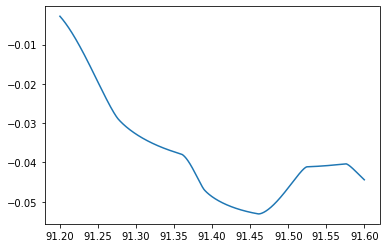

In [54]:
plt.plot(t, lc, '-')
#plt.plot(t, lc_ng_simp)
#plt.plot(t, lc_ng_trap)
#plt.axvline(91.32, color='k')

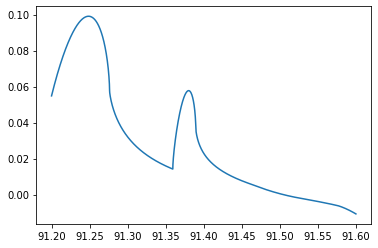

In [59]:
plt.plot(t, grad['p1'])

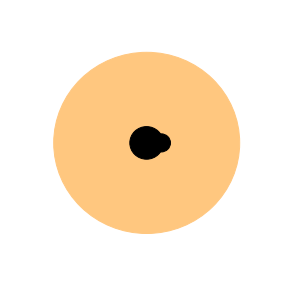

In [57]:
import animate
plt.figure(figsize=(5, 5))
animate.draw(sys, plt.gca(), 91.5, rp, rm)

In [9]:
sys.impacts(np.array([91.5]), grad=True)

(array([0.55524055]),
 array([1.31116666e-16]),
 array([0.]),
 array([[ 5.55240553e-01],
        [-3.70159546e+00],
        [ 4.30062867e+02],
        [-9.26920069e-01],
        [ 2.15031433e+02],
        [-5.09886457e-12],
        [ 1.30365562e-16],
        [ 3.12132275e-02],
        [ 9.12558932e-19],
        [ 9.52003438e-01],
        [-1.49032183e-02],
        [-9.12558932e-19],
        [ 3.53387832e-16],
        [ 9.03523695e-17]]),
 array([[ 0.00000000e+00],
        [ 0.00000000e+00],
        [ 0.00000000e+00],
        [ 0.00000000e+00],
        [ 0.00000000e+00],
        [ 0.00000000e+00],
        [ 9.25568680e-15],
        [ 2.24220758e+00],
        [ 1.30343636e-16],
        [ 6.83873312e+01],
        [-1.07057526e+00],
        [-7.64020612e-19],
        [-1.05809786e+00],
        [ 0.00000000e+00]]),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0

In [ ]:
bp, bpm, theta, _, _, _ = sys.impacts(t, grad=True)
bm = np.sqrt(bp * bp + bpm * bpm - 2 * bp * bpm * np.cos(theta))
#t[np.where(bm < 0.0000001)]

In [ ]:
lc = sys.phot(t, 0.5, 0.3, rp, rm, bp, bpm, theta, grad=True)

In [ ]:
#plt.plot(t, lc[4], '-')
plt.plot(t, bm, '-')
#plt.axvline(91.47286708)
#plt.xlim(0.000067 + 91.4728, 0.0000672 + 91.4728)

In [ ]:
sys.phot(np.array([0.1]), 0.5, 0.3, rp, rm, np.array([0.3001]), np.array([0.3]), np.array([0.0]))

In [ ]:
bp, bpm, theta = sys.kep.impacts(np.array([91.5]), sys.pdict)
bp

In [ ]:
bp, bpm, theta, _, _, _ = sys.kep.grad_impacts(np.array([91.50000001]), sys.pdict)
bpm

In [ ]:
xp, yp, zp, xm, ym, zm = sys.kep.coords(np.array([91.500000]), sys.pdict)
sys.pdict

In [ ]:
import ctypes
clib = ctypes.CDLL("../fortran/hrch.so")

In [ ]:
npl = 2 * np.pi / sys.pdict['p1']
nmo = 2 * np.pi / sys.pdict['p2']
Mp = npl * (91.6 - sys.pdict['t1'])
Mm = nmo * (91.6 - sys.pdict['t2'])

cwp = np.cos(wp)
swp = np.sin(wp)
cip = np.cos(ip)
    
comegam = np.cos(om)
somegam = np.sin(om)
cwm = np.cos(wm)
swm = np.sin(wm)
cim = np.cos(im)

mrp = - 1.0 / (1.0 + mm)
mrm = - mm * mrp

In [ ]:
def solve(M, e):
    
    M = ctypes.byref((ctypes.c_double * 1).from_buffer(np.array([M])))
    e = ctypes.byref((ctypes.c_double * 1).from_buffer(np.array([e])))
    cosf = (ctypes.c_double * 1).from_buffer(np.array([0.0]))
    sinf = (ctypes.c_double * 1).from_buffer(np.array([0.0]))
    j = ctypes.byref(ctypes.c_int(1))
    clib.kepler_solve_RPP(M, e, cosf, sinf, j)
    return np.array(cosf), np.array(sinf)

cosf, sinf = solve(Mp, ep)

denom = 1.0 / (1.0 + ep * cosf)
r = ap * (1.0 - ep * ep) / (1.0 + ep * cosf)
cosfw = cwp * cosf - swp * sinf
sinfw = swp * cosf + sinf * cwp
xbc = -r * cosfw
ybc = -r * sinfw * cip
zbc = r * sinfw * np.sin(ip) 

cosf, sinf = solve(Mm, em)
print(Mm, em, cosf, sinf)

r = am * (1.0 - em * em) / (1.0 + em * cosf)
cosfw = cwm * cosf - swm * sinf
sinfw = swm * cosf + sinf * cwm
x = -r * (comegam * cosfw - somegam * sinfw * cim)
y = -r * (somegam * cosfw + comegam * sinfw * cim)
z = r * sinfw * np.sin(im)

xp = xbc + x * mrm
yp = ybc + y * mrm
zp = zbc + z * mrm

xm = xbc + x * mrp
ym = ybc + y * mrp
zm = zbc + z * mrp

In [ ]:
cE = np.cos(Mm)
sE = np.sin(Mm)
        
tanfhalf = sE / (1.0 + cE)
tanfhalf2 = tanfhalf * tanfhalf
denom = 1.0 / (tanfhalf2 + 1.0)
cosf = (1.0 - tanfhalf2) * denom
sinf = 2 * tanfhalf * denom

sE

In [ ]:
np.tan(np.pi/2)

In [ ]:
au_r = 215

r1 = rp
r2 = rm
fill = True
cmap=plt.cm.copper
x1, y1, _, x2, y2, _ = sys.kep.coords(np.array([91.5, 91.50001]), sys.pdict) 
x1, y1, x2, y2 = x1 * au_r, y1 * au_r, x2 * au_r, y2 * au_r
b1 = plt.Circle(
    (-x1, y1),
    radius=r1,
    color='k',
    fill=fill
)
b2 = plt.Circle(
    (-x2, y2),
    radius=r2,
    color='k',
    fill=fill
)
star = plt.Circle((0, 0), radius=1, color=cmap(1.0), fill=True)
ax = plt.gca()
#ax.add_patch(star)
#ax.add_patch(b1)
#ax.add_patch(b2)
#ax.set_xlim(-1.5, 1.5)
#ax.set_ylim(-1.5, 1.5)
#ax.set_axis_off()
y2

In [ ]:
import animate
plt.figure(figsize=(5, 5))
animate.draw(sys, plt.gca(), 91.5, rp, rm)
#plt.xlim(-1.2, -0.8)
#plt.ylim(-0.2, 0.2)

In [ ]:
plt.plot(t, grad['a1'])
#plt.plot(t, grad_simp['a1'])
#plt.plot(t, grad_trap['a1'])

In [ ]:
import animate

tt = np.linspace(t.min(), t.max(), 10)
fig, axs = plt.subplots(1, len(tt))
animate.snapshots(sys, axs, tt, rp, rm, ld_params=(0.5, 0.1));

In [ ]:
edge = plt.Circle(
            (0.005, -0.0), 
            radius=1.0, 
            color='w',
            fill=False, 
            linewidth=4
        )

list(axs.values())[1:][0].imshow(np.random.randn(100, 100))

In [ ]:
lower = [['67.9', '68', '68.1', '68.2', '68.3', '68.4', '68.5', '68.6']]
outer = [[lower],
          ['upper']]

fig, axs = plt.subplot_mosaic(outer, figsize=(12, 7))

axs['upper'].plot(t, lc + 1, linewidth=3, color='k')
axs['upper'].grid()
axs['upper'].tick_params(axis='both', which='major', labelsize=12)
axs['upper'].set_xlabel('time (days)', fontsize=20)
axs['upper'].set_ylabel('relative flux', fontsize=20)

time = [67.9, 68.0, 68.1, 68.2, 68.3, 68.4, 68.5, 68.6]
animate.snapshots(sys, list(axs.values())[:-1], time, rp, rm, ld_params=(u1, u2))
[ax.set_xlim(-1.45, 1.65) for ax in list(axs.values())[:-1]]
axs['upper'].set_xlim(67.87, 68.638)
plt.subplots_adjust(hspace=-0.3, top=1.2)
plt.savefig('/Users/tgordon/Desktop/demo.pdf')

In [ ]:
from matplotlib import cm
fig, axs = plt.subplots(6, 3, figsize=(15, 15))
axs = axs.flatten()

names = [
    r'$a_p$', r'$t_p$', r'$e_p$', r'$P_p$', r'$\omega_p$', 
    r'$i_p$', r'$a_m$', r'$t_m$', r'$e_m$', r'$P_m$', 
    r'$\Omega_m$', r'$\omega_m$', r'$i_m$', r'$M_m$', 
    r'$r_p$', r'$r_m$', r'$u_1$', r'$u_2$'
]

lower_left = (0.06, 0.2)
pos = [
    None, 
    lower_left, 
    None, 
    lower_left, 
    None, 
    None, 
    None, 
    None, 
    None, 
    None, 
    None, 
    lower_left, 
    None, 
    lower_left, 
    lower_left, 
    None, 
    None, 
    None
]

moon_color = 'b'
moon_alpha = 0.5
planet_color = 'r'
planet_alpha = 0.5
star_color ='#ffae36'
star_alpha = 0.75

#axs[0].plot(t, lc, color='k', linewidth=2)
for i, (name, gradient) in enumerate(list(grad.items())):
    if i < 6:
        color = planet_color
        alpha = planet_alpha
    elif i < 14:
        color = moon_color
        alpha = moon_alpha
    else:
        color = star_color
        alpha = star_alpha
        
    if i == 14:
        color = planet_color
        alpha = planet_alpha
    if i == 15:
        color = moon_color
        alpha = moon_alpha
        
    axs[i].plot(t, gradient, color='k', linewidth=4, alpha=1)
    axs[i].plot(t, gradient, color='w', linewidth=2, alpha=1)
    axs[i].plot(t, gradient, color=color, linewidth=2, alpha=alpha)
        
    if pos[i] is not None:
        axs[i].annotate(names[i], xy=pos[i], xycoords='axes fraction', fontsize=20)
    else:
        axs[i].annotate(names[i], xy=(0.06, 0.8), xycoords='axes fraction', fontsize=20)

[ax.axes.xaxis.set_visible(False) for ax in axs[:-3]]
[ax.tick_params(axis='both', which='major', labelsize=12) for ax in axs]
[ax.set_xlabel('time (days)', fontsize=15) for ax in axs[-3:]]
#[ax.axes.yaxis.set_visible(False) for ax in axs]
#axs[-1].axis('off')

plt.subplots_adjust(wspace=0.3, hspace=0.2, bottom=0.05, top=0.95)
plt.savefig('/Users/tgordon/Desktop/derivatives.pdf')

In [ ]:
d = 0.000001

moon = system.moon(0.05, am, t0m, em, Pm, Om, wm, im, mm)
planet = system.planet(0.1, ap, t0p, ep, Pp, wp, ip)
star = system.star(0.5, 0.5)
sys = system.system(star, planet, moon)
sys.compute(t)
lc1 = sys._lc

sys.compute(t, grad=True)
lc = sys._lc

moon = system.moon(0.05, am, t0m, em, Pm, Om, wm, im, mm)
planet = system.planet(0.1, ap + d, t0p, ep, Pp, wp, ip)
star = system.star(0.5, 0.5)
sys = system.system(star, planet, moon)
sys.compute(t)
lc2 = sys._lc

sys.compute(t, grad=True)
grad = sys.grad()

plt.plot(t, (lc2 - lc1)/d)
plt.plot(t, grad['a_p'])

In [ ]:
n = 2 * np.pi / Pp
x = (1 - (1 - ep**2)) / (ep * (1 + ep * np.cos(np.pi * 0.5 - wp)))
E = np.arccos(x)
M = E - ep * np.sin(E)
tt = M / n + t0p
tt

In [ ]:
t0p = tt - M / n

In [ ]:
from kep import grad_impacts, impacts
ms = ac.M_sun.value / ac.M_earth.value
%time bp, bpm, theta, dbp, dbpm, dtheta = grad_impacts(t, ms, t0p, ep, Pp, Op, wp, ip, mp, t0m, em, Pm, Om, wm, im, mm)
%time bp, bpm, theta = impacts(t, ms, t0p, ep, Pp, Op, wp, ip, mp, t0m, em, Pm, Om, wm, im, mm)

In [ ]:
d = 0.000001
ms = ac.M_sun.value / ac.M_earth.value
bp1, bpm1, theta1 = impacts(t, ms, t0p, ep, Pp, Op, wp, ip, mp, t0m, em, Pm, Om, wm, im, mm)
bp2, bpm2, theta2 = impacts(t, ms, t0p, ep, Pp, Op + d, wp, ip, mp, t0m, em, Pm, Om , wm, im, mm)
bp3, bpm3, theta3 = impacts(t, ms, t0p, ep, Pp, Op - d, wp, ip, mp, t0m, em, Pm, Om , wm, im, mm)
plt.plot(t, (bp2 - bp3)/(2 * d))
plt.plot(t, dbp[:, 4])
plt.figure()
plt.plot(t, dbp[:, 4] - (bp2 - bp3)/(2 * d))

In [ ]:
d = 0.0000000001
bp1, bpm1, theta1 = input_coords(t, 1, t0p, ep, Pp, Op, wp, ip, mp, t0m, em, Pm, Om, wm, im, mm)
bp2, bpm2, theta2 = input_coords(t, 1, t0p, ep, Pp, Op, wp, ip, mp + d, t0m, em, Pm, Om, wm, im, mm)
plt.plot(t, dbp[:, 7])
plt.plot(t, (bp2 - bp1)/d)
plt.figure()
plt.plot(t, dbp[:, 7] - (bp2 - bp1)/d)
#plt.plot(t, (bpm1-bpm2)/d)
#plt.plot(t, (theta1-theta2)/d)

In [ ]:
plt.plot(t, bp1)
plt.plot(t, bp2)

In [ ]:
plt.plot(t, bp2)
plt.plot(t, bp1)

In [ ]:
[plt.plot(t, dbp[:, i]) for i in range(15)];

In [ ]:
star = system.star(1, 0.5, 0.5)
planet = system.rock(0.1, 10, t0p, ep, Pp, Op, wp, ip)
moon = system.rock(0.05, 5, t0m, em, Pm, Om, wm, im)
sys = system.system(star, planet, moon)
%time sys.compute(t)

In [ ]:
plt.plot(t, sys.lightcurve())

In [ ]:
plt.plot(t, sys.derivatives());

In [ ]:
a = np.random.randn(15, 100000)
b = np.random.randn(15, 100000)
c = np.random.randn(15, 100000)
d = np.random.randn(15, 100000)
e = np.random.randn(15, 100000)
f = np.random.randn(15, 100000)
g = np.random.randn(15, 100000)
h = np.random.randn(15, 100000)
i = np.random.randn(15, 100000)
j = np.random.randn(15, 100000)

In [ ]:
j

In [ ]:
mp = 10
mm = 5

In [ ]:
(1, 2, 3) + (4, 5, 6)

In [ ]:
def testfunc(a, b, c, d, e, f):
    return a + b + c + d + e + f

In [ ]:
testfunc(*((1, 2, 3) + (4, 5, 6)))

In [ ]:
from phot import flux

In [ ]:
lc = flux(0.5, 0.5, 0.1, 0.05, bp, bpm, np.cos(theta), np.sin(theta))
plt.plot(t, lc[:, 0])

In [ ]:
dflux = lc[:, 3][:, None] * dbp + lc[:, 4][:, None] * dbpm + lc[:, 5][:, None] * dtheta

In [ ]:
dflux

In [ ]:
np.shape(np.hstack([np.ones(len(t))[:, None], dflux, np.ones(len(t))[:, None]]))

In [ ]:
np.shape(dflux)

In [ ]:
arr = np.vstack([np.array([1, 2, 3]), np.array([4, 5, 6])])
names = ['line1', 'line2']

In [ ]:
d = {}
{names[i]: arr[i] for i in range(len(names))}

In [ ]:
(1,) + (2, 3)

In [ ]:
str(1)